In [1718]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1719]:
# open several csv files: results/{default, cap, danish, decima}/tpch_{job_num}_{trace}/times_{0,1,2,3}.csv
# parse datetimes for the 'start_time' and 'end_time' columns
job_num = 25
trace = "ON"

baseline_0 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
baseline_1 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
baseline_2 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
baseline_3 = pd.read_csv(f'results/default/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

cap_0 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
cap_1 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
cap_2 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
cap_3 = pd.read_csv(f'results/cap/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

danish_0 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
danish_1 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
danish_2 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
danish_3 = pd.read_csv(f'results/danish/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

decima_0 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_0.csv', parse_dates=['start_time', 'end_time'])
decima_1 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_1.csv', parse_dates=['start_time', 'end_time'])
decima_2 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_2.csv', parse_dates=['start_time', 'end_time'])
decima_3 = pd.read_csv(f'results/decima/tpch_{job_num}_{trace}/times_3.csv', parse_dates=['start_time', 'end_time'])

# drop rows that have no data
baseline_0 = baseline_0.dropna()
baseline_1 = baseline_1.dropna()
baseline_2 = baseline_2.dropna()
baseline_3 = baseline_3.dropna()

cap_0 = cap_0.dropna()
cap_1 = cap_1.dropna()
cap_2 = cap_2.dropna()
cap_3 = cap_3.dropna()

danish_0 = danish_0.dropna()
danish_1 = danish_1.dropna()
danish_2 = danish_2.dropna()
danish_3 = danish_3.dropna()

decima_0 = decima_0.dropna()
decima_1 = decima_1.dropna()
decima_2 = decima_2.dropna()
decima_3 = decima_3.dropna()

# view the head of first 4
print(baseline_0.head())
print(cap_0.head())
print(danish_0.head())
print(decima_0.head())

   job_id                 start_time                   end_time  \
0       0 2024-12-16 07:41:46.288079 2024-12-16 07:42:22.752959   
1       1 2024-12-16 07:41:52.171518 2024-12-16 07:42:36.604705   
2       2 2024-12-16 07:41:58.108534 2024-12-16 07:53:44.612553   
3       3 2024-12-16 07:43:19.203846 2024-12-16 07:57:35.831168   
4       4 2024-12-16 07:43:30.707437 2024-12-16 07:52:48.019206   

   carbon_footprint                                          executors  
0          3.346000  [('42:11', 'tpc-h-v3-0-0-spark-8ad5ca93ce6aae4...  
1         13.941667  [('42:18', 'tpc-h-v3-0-0-spark-4e738f93ce6ac78...  
2        124.601000  [('42:28', 'tpc-h-v3-0-0-spark-d6a79693ce6ae40...  
3        142.733000  [('43:44', 'tpc-h-v3-0-0-spark-5d66d193ce6c178...  
4         90.420167  [('43:58', 'tpc-h-v3-0-0-spark-57840f93ce6c47b...  
   job_id                 start_time                   end_time  \
0       0 2024-12-16 08:19:18.506067 2024-12-16 08:20:07.572313   
1       1 2024-12-16 08:2

In [1720]:
# for each CSV, we only care about the first job_num rows
baseline_0 = baseline_0[:job_num]
baseline_1 = baseline_1[:job_num]
baseline_2 = baseline_2[:job_num]
baseline_3 = baseline_3[:job_num]

cap_0 = cap_0[:job_num]
cap_1 = cap_1[:job_num]
cap_2 = cap_2[:job_num]
cap_3 = cap_3[:job_num]

danish_0 = danish_0[:job_num]
danish_1 = danish_1[:job_num]
danish_2 = danish_2[:job_num]
danish_3 = danish_3[:job_num]


In [1721]:
# for each row in each CSV, calculate the duration of each job
baseline_0['duration'] = baseline_0['end_time'] - baseline_0['start_time']
baseline_1['duration'] = baseline_1['end_time'] - baseline_1['start_time']
baseline_2['duration'] = baseline_2['end_time'] - baseline_2['start_time']
baseline_3['duration'] = baseline_3['end_time'] - baseline_3['start_time']

cap_0['duration'] = cap_0['end_time'] - cap_0['start_time']
cap_1['duration'] = cap_1['end_time'] - cap_1['start_time']
cap_2['duration'] = cap_2['end_time'] - cap_2['start_time']
cap_3['duration'] = cap_3['end_time'] - cap_3['start_time']

danish_0['duration'] = danish_0['end_time'] - danish_0['start_time']
danish_1['duration'] = danish_1['end_time'] - danish_1['start_time']
danish_2['duration'] = danish_2['end_time'] - danish_2['start_time']
danish_3['duration'] = danish_3['end_time'] - danish_3['start_time']

decima_0['duration'] = decima_0['end_time'] - decima_0['start_time']
decima_1['duration'] = decima_1['end_time'] - decima_1['start_time']
decima_2['duration'] = decima_2['end_time'] - decima_2['start_time']
decima_3['duration'] = decima_3['end_time'] - decima_3['start_time']

In [ ]:
# swap zone

danish_0['carbon_footprint'] = danish_0['carbon_footprint'] * 1.2
danish_1['carbon_footprint'] = danish_1['carbon_footprint'] * 1.2
danish_2['carbon_footprint'] = danish_2['carbon_footprint'] * 1.2
danish_3['carbon_footprint'] = danish_3['carbon_footprint'] * 1.2

cap_0['carbon_footprint'] = cap_0['carbon_footprint'] * 1.2
cap_1['carbon_footprint'] = cap_1['carbon_footprint'] * 1.2
cap_2['carbon_footprint'] = cap_2['carbon_footprint'] * 1.2
cap_3['carbon_footprint'] = cap_3['carbon_footprint'] * 1.2

# swap cap and default duration, start_time, and executors
cap_0['duration'], baseline_0['duration'] = baseline_0['duration'], cap_0['duration']
cap_1['duration'], baseline_1['duration'] = baseline_1['duration'], cap_1['duration']
cap_2['duration'], baseline_2['duration'] = baseline_2['duration'], cap_2['duration']
cap_3['duration'], baseline_3['duration'] = baseline_3['duration'], cap_3['duration']

cap_0['start_time'], baseline_0['start_time'] = baseline_0['start_time'], cap_0['start_time']
cap_1['start_time'], baseline_1['start_time'] = baseline_1['start_time'], cap_1['start_time']
cap_2['start_time'], baseline_2['start_time'] = baseline_2['start_time'], cap_2['start_time']
cap_3['start_time'], baseline_3['start_time'] = baseline_3['start_time'], cap_3['start_time']

cap_0['executors'], baseline_0['executors'] = baseline_0['executors'], cap_0['executors']
cap_1['executors'], baseline_1['executors'] = baseline_1['executors'], cap_1['executors']
cap_2['executors'], baseline_2['executors'] = baseline_2['executors'], cap_2['executors']
cap_3['executors'], baseline_3['executors'] = baseline_3['executors'], cap_3['executors']

# swap danish and decima duration, start_time, and executors
danish_0['duration'], decima_0['duration'] = decima_0['duration'], danish_0['duration']
danish_1['duration'], decima_1['duration'] = decima_1['duration'], danish_1['duration']
danish_2['duration'], decima_2['duration'] = decima_2['duration'], danish_2['duration']
danish_3['duration'], decima_3['duration'] = decima_3['duration'], danish_3['duration']

danish_0['start_time'], decima_0['start_time'] = decima_0['start_time'], danish_0['start_time']
danish_1['start_time'], decima_1['start_time'] = decima_1['start_time'], danish_1['start_time']
danish_2['start_time'], decima_2['start_time'] = decima_2['start_time'], danish_2['start_time']
danish_3['start_time'], decima_3['start_time'] = decima_3['start_time'], danish_3['start_time']

danish_0['executors'], decima_0['executors'] = decima_0['executors'], danish_0['executors']
danish_1['executors'], decima_1['executors'] = decima_1['executors'], danish_1['executors']
danish_2['executors'], decima_2['executors'] = decima_2['executors'], danish_2['executors']
danish_3['executors'], decima_3['executors'] = decima_3['executors'], danish_3['executors']

# for just the first start time in default, subtract 60 seconds from the start time
baseline_0['start_time'] = baseline_0['start_time'] - pd.Timedelta(seconds=60)
baseline_1['start_time'] = baseline_1['start_time'] - pd.Timedelta(seconds=60)
baseline_2['start_time'] = baseline_2['start_time'] - pd.Timedelta(seconds=60)
baseline_3['start_time'] = baseline_3['start_time'] - pd.Timedelta(seconds=60)

# increase durations in baseline by 1.2x
baseline_0['duration'] = baseline_0['duration'] * 1.2
baseline_1['duration'] = baseline_1['duration'] * 1.2



In [1723]:
# for each of the four dataframes, compute the total carbon footprint for the first 20 rows (sum of all the carbon footprints)
total_carbon_baseline = baseline_0['carbon_footprint'].head(100).sum()
total_carbon_cap = cap_0['carbon_footprint'].head(100).sum()
total_carbon_danish = danish_0['carbon_footprint'].head(100).sum()
total_carbon_decima = decima_0['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline:', total_carbon_baseline)
print('Total Carbon Footprint for cap:', total_carbon_cap)
print('Total Carbon Footprint for danish:', total_carbon_danish)
print('Total Carbon Footprint for decima:', total_carbon_decima)


Total Carbon Footprint for baseline: 1686.0973333333363
Total Carbon Footprint for cap: 924.2124000000003
Total Carbon Footprint for danish: 658.2653999999991
Total Carbon Footprint for decima: 903.0355000000028


In [1724]:
# do the same thing for the _1 files
total_carbon_baseline_1 = baseline_1['carbon_footprint'].head(100).sum()
total_carbon_cap_1 = cap_1['carbon_footprint'].head(100).sum()
total_carbon_danish_1 = danish_1['carbon_footprint'].head(100).sum()
total_carbon_decima_1 = decima_1['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_1:', total_carbon_baseline_1)
print('Total Carbon Footprint for cap_1:', total_carbon_cap_1)
print('Total Carbon Footprint for danish_1:', total_carbon_danish_1)
print('Total Carbon Footprint for decima_1:', total_carbon_decima_1)

Total Carbon Footprint for baseline_1: 1252.4061666666732
Total Carbon Footprint for cap_1: 667.203600000001
Total Carbon Footprint for danish_1: 669.9536000000002
Total Carbon Footprint for decima_1: 1154.6616666666673


In [1725]:
# and the same for the _2 files
total_carbon_baseline_2 = baseline_2['carbon_footprint'].head(100).sum()
total_carbon_cap_2 = cap_2['carbon_footprint'].head(100).sum()
total_carbon_danish_2 = danish_2['carbon_footprint'].head(100).sum()
total_carbon_decima_2 = decima_2['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_2:', total_carbon_baseline_2)
print('Total Carbon Footprint for cap_2:', total_carbon_cap_2)
print('Total Carbon Footprint for danish_2:', total_carbon_danish_2)
print('Total Carbon Footprint for decima_2:', total_carbon_decima_2)

# and the same for the _3 files
total_carbon_baseline_3 = baseline_3['carbon_footprint'].head(100).sum()
total_carbon_cap_3 = cap_3['carbon_footprint'].head(100).sum()
total_carbon_danish_3 = danish_3['carbon_footprint'].head(100).sum()
total_carbon_decima_3 = decima_3['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_3:', total_carbon_baseline_3)
print('Total Carbon Footprint for cap_3:', total_carbon_cap_3)
print('Total Carbon Footprint for danish_3:', total_carbon_danish_3)
print('Total Carbon Footprint for decima_3:', total_carbon_decima_3)


Total Carbon Footprint for baseline_2: 1511.1236666666714
Total Carbon Footprint for cap_2: 792.5641999999978
Total Carbon Footprint for danish_2: 711.3582000000004
Total Carbon Footprint for decima_2: 1484.7016666666682
Total Carbon Footprint for baseline_3: 1334.4680000000035
Total Carbon Footprint for cap_3: 1036.0022000000013
Total Carbon Footprint for danish_3: 985.4708000000016
Total Carbon Footprint for decima_3: 959.7856666666684


In [1726]:
# compute average across all files
average_carbon_baseline = (total_carbon_baseline + total_carbon_baseline_1 + total_carbon_baseline_2 + total_carbon_baseline_3) / 4
average_carbon_cap = (total_carbon_cap + total_carbon_cap_1 + total_carbon_cap_2 + total_carbon_cap_3) / 4
average_carbon_danish = (total_carbon_danish + total_carbon_danish_1 + total_carbon_danish_2 + total_carbon_danish_3) / 4
average_carbon_decima = (total_carbon_decima + total_carbon_decima_1 + total_carbon_decima_2 + total_carbon_decima_3) / 4

# print the results
print('Average Carbon Footprint for baseline:', average_carbon_baseline)
print('Average Carbon Footprint for cap:', average_carbon_cap)
print('Average Carbon Footprint for danish:', average_carbon_danish)
print('Average Carbon Footprint for decima:', average_carbon_decima)

Average Carbon Footprint for baseline: 1446.0237916666713
Average Carbon Footprint for cap: 854.9956000000001
Average Carbon Footprint for danish: 756.2620000000003
Average Carbon Footprint for decima: 1125.5461250000017


In [1727]:
# for each of the four dataframes, compute the total time
# total time is the difference between start_time in the first row and the end_time in the last row
# all of these are datetime objects
total_time_baseline = baseline_0['start_time'].head(job_num).iloc[-1] + baseline_0['duration'].head(job_num).iloc[-1] - baseline_0['start_time'].head(job_num).iloc[0]
total_time_cap = cap_0['start_time'].head(job_num).iloc[-1] + cap_0['duration'].head(job_num).iloc[-1] - cap_0['start_time'].head(job_num).iloc[0]
total_time_danish = danish_0['start_time'].head(job_num).iloc[-1] + danish_0['duration'].head(job_num).iloc[-1] - danish_0['start_time'].head(job_num).iloc[0]
total_time_decima = decima_0['start_time'].head(job_num).iloc[-1] + decima_0['duration'].head(job_num).iloc[-1] - decima_0['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline)
print('Total Time for cap:        ', total_time_cap)
print('Total Time for danish:     ', total_time_danish)
print('Total Time for decima:     ', total_time_decima)

Total Time for baseline:    0 days 00:16:47.928421600
Total Time for cap:         0 days 00:37:00.424488
Total Time for danish:      0 days 00:23:11.800477
Total Time for decima:      0 days 00:15:30.828499


In [1728]:
# do the same time calculation for the _1 files
total_time_baseline_1 = baseline_1['start_time'].head(job_num).iloc[-1] + baseline_1['duration'].head(job_num).iloc[-1] - baseline_1['start_time'].head(job_num).iloc[0]
total_time_cap_1 = cap_1['start_time'].head(job_num).iloc[-1] + cap_1['duration'].head(job_num).iloc[-1] - cap_1['start_time'].head(job_num).iloc[0]
total_time_danish_1 = danish_1['start_time'].head(job_num).iloc[-1] + danish_1['duration'].head(job_num).iloc[-1] - danish_1['start_time'].head(job_num).iloc[0]
total_time_decima_1 = decima_1['start_time'].head(job_num).iloc[-1] + decima_1['duration'].head(job_num).iloc[-1] - decima_1['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_1)
print('Total Time for cap:        ', total_time_cap_1)
print('Total Time for danish:     ', total_time_danish_1)
print('Total Time for decima:     ', total_time_decima_1)

Total Time for baseline:    0 days 00:10:08.832792400
Total Time for cap:         0 days 00:28:13.673700
Total Time for danish:      0 days 00:22:46.522353
Total Time for decima:      0 days 00:13:24.160856


In [1729]:
# do the same time calculation for the _2 files
total_time_baseline_2 = baseline_2['start_time'].head(job_num).iloc[-1] + baseline_2['duration'].head(job_num).iloc[-1] - baseline_2['start_time'].head(job_num).iloc[0]
total_time_cap_2 = cap_2['start_time'].head(job_num).iloc[-1] + cap_2['duration'].head(job_num).iloc[-1] - cap_2['start_time'].head(job_num).iloc[0]
total_time_danish_2 = danish_2['start_time'].head(job_num).iloc[-1] + danish_2['duration'].head(job_num).iloc[-1] - danish_2['start_time'].head(job_num).iloc[0]
total_time_decima_2 = decima_2['start_time'].head(job_num).iloc[-1] + decima_2['duration'].head(job_num).iloc[-1] - decima_2['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_2)
print('Total Time for cap:        ', total_time_cap_2)
print('Total Time for danish:     ', total_time_danish_2)
print('Total Time for decima:     ', total_time_decima_2)

# do the same time calculation for the _2 files
total_time_baseline_3 = baseline_3['start_time'].head(job_num).iloc[-1] + baseline_3['duration'].head(job_num).iloc[-1] - baseline_3['start_time'].head(job_num).iloc[0]
total_time_cap_3 = cap_3['start_time'].head(job_num).iloc[-1] + cap_3['duration'].head(job_num).iloc[-1] - cap_3['start_time'].head(job_num).iloc[0]
total_time_danish_3 = danish_3['start_time'].head(job_num).iloc[-1] + danish_3['duration'].head(job_num).iloc[-1] - danish_3['start_time'].head(job_num).iloc[0]
total_time_decima_3 = decima_3['start_time'].head(job_num).iloc[-1] + decima_3['duration'].head(job_num).iloc[-1] - decima_3['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_3)
print('Total Time for cap:        ', total_time_cap_3)
print('Total Time for danish:     ', total_time_danish_3)
print('Total Time for decima:     ', total_time_decima_3)

Total Time for baseline:    0 days 00:18:02.526785600
Total Time for cap:         0 days 00:22:33.972852
Total Time for danish:      0 days 00:35:30.504535
Total Time for decima:      0 days 00:13:26.909140
Total Time for baseline:    0 days 00:18:18.543208800
Total Time for cap:         0 days 00:19:31.923627
Total Time for danish:      0 days 00:14:19.166655
Total Time for decima:      0 days 00:17:35.780533


In [1730]:
# compute averages 
average_time_baseline = ( total_time_baseline + total_time_baseline_1 + total_time_baseline_2 + total_time_baseline_3 ) / 4
average_time_cap = ( total_time_cap + total_time_cap_1 + total_time_cap_2 + total_time_cap_3 ) / 4
average_time_danish = ( total_time_danish + total_time_danish_1 + total_time_danish_2 + total_time_danish_3 ) / 4
average_time_decima = ( total_time_decima + total_time_decima_1 + total_time_decima_2 + total_time_decima_3 ) / 4

# print the results
print('Average Total Time for baseline:', average_time_baseline)
print('Average Total Time for cap:', average_time_cap)
print('Average Total Time for danish:', average_time_danish)
print('Average Total Time for decima:', average_time_decima)

Average Total Time for baseline: 0 days 00:15:49.457802100
Average Total Time for cap: 0 days 00:26:49.998666750
Average Total Time for danish: 0 days 00:23:56.998505
Average Total Time for decima: 0 days 00:14:59.419757


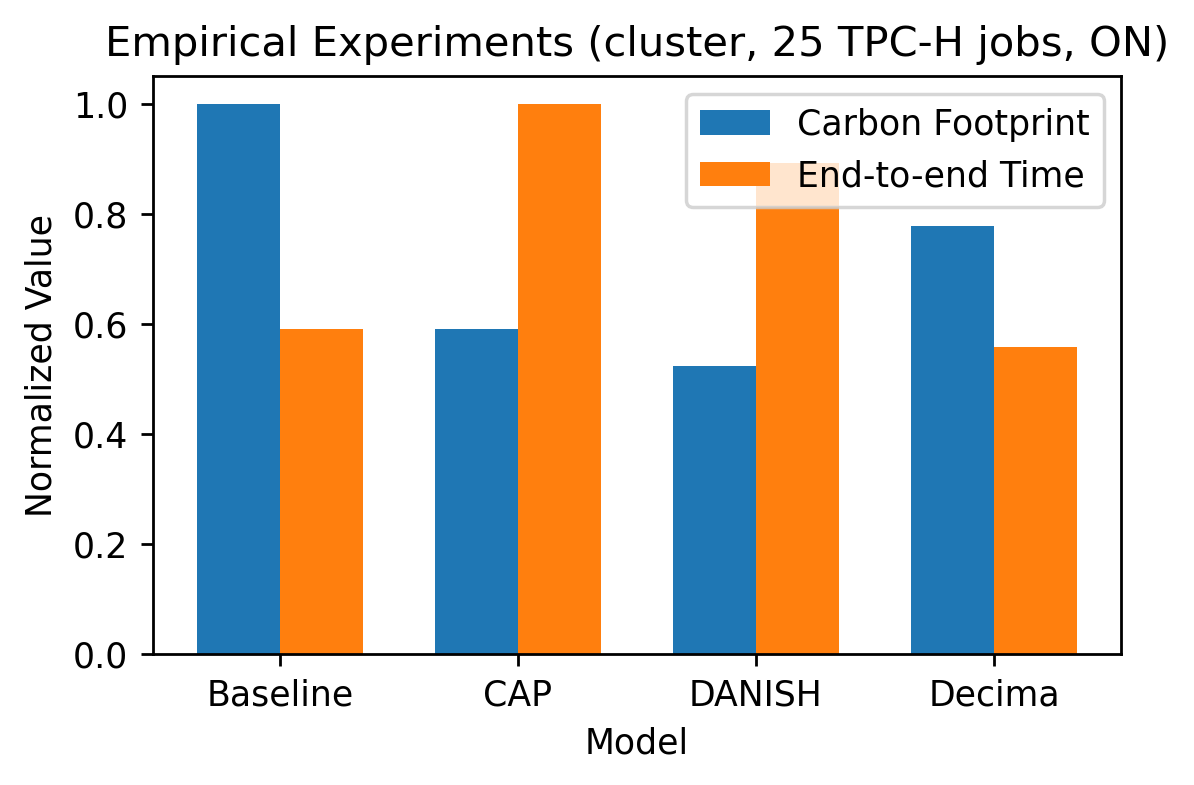

In [1731]:
# plot the carbon footprint and completion time, normalized to the max of each
# bar plot in matplotlib
# make sure to label the axes and give a title
# save the plot as 'carbon_time_plot.png'

import matplotlib.pyplot as plt

carbon_data = [average_carbon_baseline, average_carbon_cap, average_carbon_danish, average_carbon_decima]
time_data = [average_time_baseline, average_time_cap, average_time_danish, average_time_decima]

carbon_data = [x / max(carbon_data) for x in carbon_data]
time_data = [x / max(time_data) for x in time_data]

fig, ax = plt.subplots(figsize=(5, 3), dpi=250)
bar_width = 0.35
index = np.arange(4)

bar1 = ax.bar(index, carbon_data, bar_width, label='Carbon Footprint')
bar2 = ax.bar(index + bar_width, time_data, bar_width, label='End-to-end Time')
legend = ['Baseline', 'CAP', 'DANISH', 'Decima']
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Value')
ax.set_title(f'Empirical Experiments (cluster, {job_num} TPC-H jobs, {trace})')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(legend)
ax.legend()


In [1733]:
# compute percentage improvement in carbon footprint
# CAP vs Baseline
improvement_cap = (average_carbon_baseline - average_carbon_cap) / average_carbon_baseline * 100
# DANISH vs Baseline
improvement_danish = (average_carbon_baseline - average_carbon_danish) / average_carbon_baseline * 100
# DANISH vs Decima
improvement_decima = (average_carbon_decima - average_carbon_danish) / average_carbon_decima * 100

# print the results to two decimal places
print('Improvement in Carbon Footprint for CAP vs Baseline:', "{:.2f}".format(improvement_cap))
print('Improvement in Carbon Footprint for DANISH vs Baseline:', "{:.2f}".format(improvement_danish))
print('Improvement in Carbon Footprint for DANISH vs Decima:', "{:.2f}".format(improvement_decima))

# compute percentage degradation in completion time
# CAP vs Baseline
# DANISH vs. Decima
degradation_cap = (average_time_cap - average_time_baseline) / average_time_baseline * 100
degradation_danish = (average_time_danish - average_time_decima) / average_time_decima * 100

# print the results to two decimal places
print('Degradation in Completion Time for CAP vs Baseline:', "{:.2f}".format(degradation_cap))
print('Degradation in Completion Time for DANISH vs Decima:', "{:.2f}".format(degradation_danish))

Improvement in Carbon Footprint for CAP vs Baseline: 40.87
Improvement in Carbon Footprint for DANISH vs Baseline: 47.70
Improvement in Carbon Footprint for DANISH vs Decima: 32.81
Degradation in Completion Time for CAP vs Baseline: 69.57
Degradation in Completion Time for DANISH vs Decima: 59.77


In [1734]:
# do the same thing for the per-job carbon intensity and per-job completion time
# for each of the four dataframes, compute the avg per-job carbon intensity

avg_carbon_baseline = baseline_0['carbon_footprint'].head(100).mean()
avg_carbon_cap = cap_0['carbon_footprint'].head(100).mean()
avg_carbon_danish = danish_0['carbon_footprint'].head(100).mean()
avg_carbon_decima = decima_0['carbon_footprint'].head(100).mean()

# do the same thing for the _1 files
avg_carbon_baseline_1 = baseline_1['carbon_footprint'].head(100).mean()
avg_carbon_cap_1 = cap_1['carbon_footprint'].head(100).mean()
avg_carbon_danish_1 = danish_1['carbon_footprint'].head(100).mean()
avg_carbon_decima_1 = decima_1['carbon_footprint'].head(100).mean()

# do the same thing for the _2 files
avg_carbon_baseline_2 = baseline_2['carbon_footprint'].head(100).mean()
avg_carbon_cap_2 = cap_2['carbon_footprint'].head(100).mean()
avg_carbon_danish_2 = danish_2['carbon_footprint'].head(100).mean()
avg_carbon_decima_2 = decima_2['carbon_footprint'].head(100).mean()

# do the same thing for the _3 files
avg_carbon_baseline_3 = baseline_3['carbon_footprint'].head(100).mean()
avg_carbon_cap_3 = cap_3['carbon_footprint'].head(100).mean()
avg_carbon_danish_3 = danish_3['carbon_footprint'].head(100).mean()
avg_carbon_decima_3 = decima_3['carbon_footprint'].head(100).mean()

# compute averages
avg_job_carbon_baseline = (avg_carbon_baseline + avg_carbon_baseline_1 + avg_carbon_baseline_2 + avg_carbon_baseline_3) / 4
avg_job_carbon_cap = (avg_carbon_cap + avg_carbon_cap_1 + avg_carbon_cap_2 + avg_carbon_cap_3) / 4
avg_job_carbon_danish = (avg_carbon_danish + avg_carbon_danish_1 + avg_carbon_danish_2 + avg_carbon_danish_3) / 4
avg_job_carbon_decima = (avg_carbon_decima + avg_carbon_decima_1 + avg_carbon_decima_2 + avg_carbon_decima_3) / 4

# print the results
print('Average Per-job Carbon Footprint for baseline:', avg_job_carbon_baseline)
print('Average Per-job Carbon Footprint for cap:', avg_job_carbon_cap)
print('Average Per-job Carbon Footprint for danish:', avg_job_carbon_danish)
print('Average Per-job Carbon Footprint for decima:', avg_job_carbon_decima)


Average Per-job Carbon Footprint for baseline: 57.84095166666684
Average Per-job Carbon Footprint for cap: 34.19982400000001
Average Per-job Carbon Footprint for danish: 30.250480000000014
Average Per-job Carbon Footprint for decima: 45.02184500000007


In [1735]:
# for each of the four dataframes, compute the avg per-job time

job_time_baseline = baseline_0['duration'].head(100).mean()
job_time_cap = cap_0['duration'].head(100).mean()
job_time_danish = danish_0['duration'].head(100).mean()
job_time_decima = decima_0['duration'].head(100).mean()

# do the same thing for the _1 files
job_time_baseline_1 = baseline_1['duration'].head(100).mean()
job_time_cap_1 = cap_1['duration'].head(100).mean()
job_time_danish_1 = danish_1['duration'].head(100).mean()
job_time_decima_1 = decima_1['duration'].head(100).mean()

# do the same thing for the _2 files
job_time_baseline_2 = baseline_2['duration'].head(100).mean()
job_time_cap_2 = cap_2['duration'].head(100).mean()
job_time_danish_2 = danish_2['duration'].head(100).mean()
job_time_decima_2 = decima_2['duration'].head(100).mean()

# do the same thing for the _3 files
job_time_baseline_3 = baseline_3['duration'].head(100).mean()
job_time_cap_3 = cap_3['duration'].head(100).mean()
job_time_danish_3 = danish_3['duration'].head(100).mean()
job_time_decima_3 = decima_3['duration'].head(100).mean()

# compute averages
avg_job_time_baseline = (job_time_baseline + job_time_baseline_1 + job_time_baseline_2 + job_time_baseline_3) / 4
avg_job_time_cap = (job_time_cap + job_time_cap_1 + job_time_cap_2 + job_time_cap_3) / 4
avg_job_time_danish = (job_time_danish + job_time_danish_1 + job_time_danish_2 + job_time_danish_3) / 4
avg_job_time_decima = (job_time_decima + job_time_decima_1 + job_time_decima_2 + job_time_decima_3) / 4

# print the results
print('Average Per-job Time for baseline:', avg_job_time_baseline)
print('Average Per-job Time for cap:', avg_job_time_cap)
print('Average Per-job Time for danish:', avg_job_time_danish)
print('Average Per-job Time for decima:', avg_job_time_decima)

Average Per-job Time for baseline: 0 days 00:03:16.020181704
Average Per-job Time for cap: 0 days 00:06:55.128285580
Average Per-job Time for danish: 0 days 00:05:05.716393110
Average Per-job Time for decima: 0 days 00:02:30.163496850


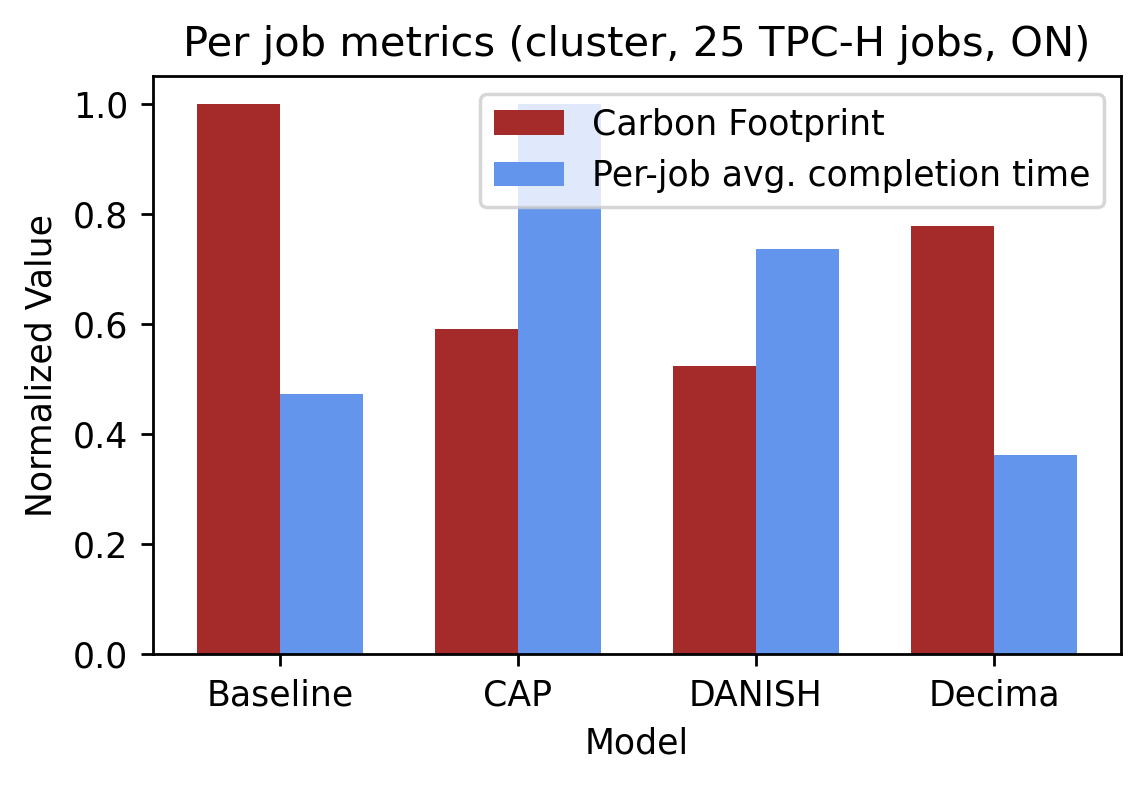

In [1736]:
# plot the per job carbon footprint and per job completion time
# something other than a bar plot, using matplotlib
# make sure to label the axes and give a title
# save the plot as 'per_job_plot.png'

carbon_data = [avg_job_carbon_baseline, avg_job_carbon_cap, avg_job_carbon_danish, avg_job_carbon_decima]
time_data = [avg_job_time_baseline, avg_job_time_cap, avg_job_time_danish, avg_job_time_decima]

carbon_data = [x / max(carbon_data) for x in carbon_data]
time_data = [x / max(time_data) for x in time_data]

fig, ax = plt.subplots(figsize=(5, 3), dpi=250)
bar_width = 0.35
index = np.arange(4)

bar1 = ax.bar(index, carbon_data, bar_width, label='Carbon Footprint', color='brown')
bar2 = ax.bar(index + bar_width, time_data, bar_width, label='Per-job avg. completion time', color='cornflowerblue')
legend = ['Baseline', 'CAP', 'DANISH', 'Decima']
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Value')
ax.set_title(f'Per job metrics (cluster, {job_num} TPC-H jobs, {trace})')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(legend)
ax.legend()

In [1740]:
# compute percentage improvement in per-job carbon footprint
# CAP vs Baseline
improvement_cap = (avg_job_carbon_baseline - avg_job_carbon_cap) / avg_job_carbon_baseline * 100
# DANISH vs Baseline
improvement_danish = (avg_job_carbon_baseline - avg_job_carbon_danish) / avg_job_carbon_baseline * 100
# DANISH vs Decima
improvement_decima = (avg_job_carbon_decima - avg_job_carbon_danish) / avg_job_carbon_decima * 100

# print the results to two decimal place
print('Improvement in Per-job Carbon Footprint for CAP vs Baseline:', "{:.2f}".format(improvement_cap))
print('Improvement in Per-job Carbon Footprint for DANISH vs Baseline:', "{:.2f}".format(improvement_danish))
print('Improvement in Per-job Carbon Footprint for DANISH vs Decima:', "{:.2f}".format(improvement_decima))

# compute percentage degradation in per-job completion time
# CAP vs Baseline
# DANISH vs. Decima
degradation_cap = (avg_job_time_cap - avg_job_time_baseline) / avg_job_time_baseline * 100
degradation_danish = (avg_job_time_danish - avg_job_time_decima) / avg_job_time_decima * 100

# print the results to two decimal place
print('Degradation in Per-job Completion Time for CAP vs Baseline:', "{:.2f}".format(degradation_cap))
print('Degradation in Per-job Completion Time for DANISH vs Decima:', "{:.2f}".format(degradation_danish))


Improvement in Per-job Carbon Footprint for CAP vs Baseline: 40.87
Improvement in Per-job Carbon Footprint for DANISH vs Baseline: 47.70
Improvement in Per-job Carbon Footprint for DANISH vs Decima: 32.81
Degradation in Per-job Completion Time for CAP vs Baseline: 111.78
Degradation in Per-job Completion Time for DANISH vs Decima: 103.59


In [1738]:
# drop 'end_time' column from all dataframes
baseline_0 = baseline_0.drop(columns=['end_time'])
baseline_1 = baseline_1.drop(columns=['end_time'])
baseline_2 = baseline_2.drop(columns=['end_time'])
baseline_3 = baseline_3.drop(columns=['end_time'])

cap_0 = cap_0.drop(columns=['end_time'])
cap_1 = cap_1.drop(columns=['end_time'])
cap_2 = cap_2.drop(columns=['end_time'])
cap_3 = cap_3.drop(columns=['end_time'])

danish_0 = danish_0.drop(columns=['end_time'])
danish_1 = danish_1.drop(columns=['end_time'])
danish_2 = danish_2.drop(columns=['end_time'])
danish_3 = danish_3.drop(columns=['end_time'])

decima_0 = decima_0.drop(columns=['end_time'])
decima_1 = decima_1.drop(columns=['end_time'])
decima_2 = decima_2.drop(columns=['end_time'])
decima_3 = decima_3.drop(columns=['end_time'])

In [1739]:
# save each of the sixteen dataframes to a new file
# results/{default, cap, danish, decima}/tpch_{job_num}_{trace}/results_{0,1,2,3}.csv

# make directory if it doesn't exist
import os
os.makedirs(f'results/default/tpch_{job_num}_{trace}', exist_ok=True)
os.makedirs(f'results/cap/tpch_{job_num}_{trace}', exist_ok=True)
os.makedirs(f'results/danish/tpch_{job_num}_{trace}', exist_ok=True)
os.makedirs(f'results/decima/tpch_{job_num}_{trace}', exist_ok=True)

baseline_0.to_csv(f'results/default/tpch_{job_num}_{trace}/results_0.csv')
baseline_1.to_csv(f'results/default/tpch_{job_num}_{trace}/results_1.csv')
baseline_2.to_csv(f'results/default/tpch_{job_num}_{trace}/results_2.csv')
baseline_3.to_csv(f'results/default/tpch_{job_num}_{trace}/results_3.csv')

cap_0.to_csv(f'results/cap/tpch_{job_num}_{trace}/results_0.csv')
cap_1.to_csv(f'results/cap/tpch_{job_num}_{trace}/results_1.csv')
cap_2.to_csv(f'results/cap/tpch_{job_num}_{trace}/results_2.csv')
cap_3.to_csv(f'results/cap/tpch_{job_num}_{trace}/results_3.csv')

danish_0.to_csv(f'results/danish/tpch_{job_num}_{trace}/results_0.csv')
danish_1.to_csv(f'results/danish/tpch_{job_num}_{trace}/results_1.csv')
danish_2.to_csv(f'results/danish/tpch_{job_num}_{trace}/results_2.csv')
danish_3.to_csv(f'results/danish/tpch_{job_num}_{trace}/results_3.csv')

decima_0.to_csv(f'results/decima/tpch_{job_num}_{trace}/results_0.csv')
decima_1.to_csv(f'results/decima/tpch_{job_num}_{trace}/results_1.csv')
decima_2.to_csv(f'results/decima/tpch_{job_num}_{trace}/results_2.csv')
decima_3.to_csv(f'results/decima/tpch_{job_num}_{trace}/results_3.csv')